# EAE 127 - Project 4: Source Panel Method

Chung Yin Leung (998238900)

---

Imports and setup code:

In [1]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

---

## Introduction

In this project, the source panel method and its characteristics are examined. First, the source panel method is used to analyze a uniform flow over a non-rotating cylinder. Three sets of panels are used to calculate the surface pressure. The number of panels is varied to examine the effect that it has on the results. One of the three sets of panels is also used for the velocity field, and pressure contours. Second, the source panel method is used to analyze a symmetrical airfoil in a uniform flow. Surface pressure coefficient results are compared between a panel method using uniform x-spacing, a panel method using circular x-spacing, and the results from the XFOIL program. The number of panels is varied to examine the effect it has on the resultant lift and drag coefficient values. Third, the source panel method is used to calculate lift over a half-cylinder. This is possible because there is a dividing streamline that represents the flat ground.

---

### Problem 1: Flow Over A Non-Rotating Cylinder

#### Approach

The source panel method is used to approximate the surface of a cylinder in a uniform flow. Three sets of panels are used to approximate the cylinder: the first set require 8 panels, the second set requires 32 panels, and the third requires 100 panels. Depending on the number of panels, angles linearly spaced between 0 to 2$\pi$ are generated. These angles are transformed into (x,y) values using the polar coordinates transformation equations. These (x,y) values are then used as end points for the panels. With the geometry of the panels, the source strength of the set of panels is calculated using a system of equations derived from the total velocity potential of the panels and the conditon that the normal velocity is zero. Using another system of equations derived from the total velocity potential, the tangential velocity for each panel is also calculated. Then the surface pressure of each panel is easily calculated from the tangential velocity of each panel.

Using the angle each panel makes with the positive x-axis, the pressure coefficient values are plotted against the counterclockwise angle around the circle. Values of the pressure coefficient from the analytical solution are also generated over the range from 0 to 2$\pi$ and plotted. This is repeated on a new figure for each case.

The equation for the error is given as the integral of the surface pressure across the entire surface of the cylinder. The analytical term is calculated directly since the function for the pressure coefficient is know. The panel method term is calculated using the trapezoidal rule. Through iteration, the error is found for an increasing number of panels, and the error is plotted as a function of the number of panels.

For the 32 panels case, the functions for the x, y components of the velocity generated by the panels is derived by taking the derivative of the velocity potential with respect to x or y. The functions are used to calculate the velocity vectors across an entire grid. Adding the uniform flow velocity vectors to the velocity vectors of the panels allow a flow field to be generated. Knowing the velocity vector in the grid, the pressure coefficient at the same point can be calculated using the magnitude of the velocity. The pressure coefficients are then plotted as contours.

#### Equations

The velocity potential of a set of source panels and a uniform is defined below:

$$
\phi\left(x,y\right) = U_\infty x +
\sum_{j=1}^{N_p} \frac{\sigma_j}{4\pi}
\int \ln \left( \left(x-x_j(s_j)\right)^2 + \left(y-y_j(s_j)\right)^2 \right) {\rm d}s_j
$$

The $x_j$ and $y_j$ terms are (x,y) locations of a point along a panel. They are defined below as a function of the parametric distance along a panel:

$$
x_j(s_j) = x_{j,a} - s_j\sin\beta
$$

$$
y_j(s_j) = y_{j,a} + s_j\cos\beta
$$


The source panel method requires the normal velocity at the control point of the panel to be 0. By taking the derivative of the velocity potential with respect to the normal direction of a panel the 0 normal velocity boundary condition can be imposed:

$$
u_{n_i} = \frac{\partial}{\partial n_i}\left[ \phi\left(x_{c_i},y_{c_i}\right) \right] = 0
$$

By taking the derivative, the following equation results:

$$
0=U_\infty \cos\beta_i + \frac{\sigma_i}{2} + 
\sum_{j=1,j\neq i}^{N_p} \frac{\sigma_j}{2\pi}
\int 
\frac
{\left(x_{c_i}-x_j(s_j)\right)\cos\beta_i + \left(y_{c_i}-y_j(s_j)\right) \sin\beta_i}
{\left(x_{c_i}-x_j(s_j)\right)^2 + \left(y_{c_i}-y_j(s_j)\right)^2} 
{\rm d}s_j
$$

The effect of the panel on itself is half of the source strength of the panel. This allows the equation to be simplified as follows:

$$
\frac{\sigma_i}{2} + 
\sum_{j=1,j\neq i}^{N_p} \frac{\sigma_j}{2\pi}
\int 
\frac
{\left(x_{c_i}-x_j(s_j)\right)\cos\beta_i + \left(y_{c_i}-y_j(s_j)\right) \sin\beta_i}
{\left(x_{c_i}-x_j(s_j)\right)^2 + \left(y_{c_i}-y_j(s_j)\right)^2} 
{\rm d}s_j
=- U_\infty \cos\beta_i
$$


The resultant equation can be used to solve for the source strengths of each panel.

The function below evaluates the integral inside the summation:

In [2]:
def integral_normal(p_i, p_j):
    """Evaluates the contribution of a panel at the center-point of another,
    in the normal direction.
    
    Arguments
    ---------
    p_i -- panel on which the contribution is calculated.
    p_j -- panel from which the contribution is calculated.
    
    Returns
    -------
    Integral over the panel of the influence at a control-point.
    """
    def func(s):
        return ( (+(p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))*math.cos(p_i.beta)
                  +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))*math.sin(p_i.beta))
                /((p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))**2
                  +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))**2) )
    return integrate.quad(lambda s:func(s), 0., p_j.length)[0]

In matrix notation, the source strengths can be written as follows:

$$
\boldsymbol{\rm A}\vec{\sigma} = \vec{b}
$$

And $\boldsymbol{\rm A}$ and $\vec{b}$ are defined as follows:

$$A_{ij} = \begin{cases}
\begin{matrix}
\frac{1}{2} & , i=j \cr
\frac{1}{2\pi} \int \frac{
\left(x_{c_i}-x_j(s_j)\right) \cos\beta_i
+ \left(y_{c_i}-y_j(s_j)\right) \sin\beta_i
}
{\left(x_{c_i}-x_j(s)\right)^2 + \left(y_{c_i}-y_j(s)\right)^2} ds_j & , i\neq j
\end{matrix}
\end{cases}$$

$$b_i = - U_\infty \cos\beta_i$$

The main diagonal of $\boldsymbol{\rm A}$ is always 0.5 and the rest of the entries contains the integral defined above. $\vec{b}$ is not constant and changes depending on the i-th panel's angle with the positive x-axis.

This system of equations is solved by the defined function below.

In [3]:
def panels_strength(panels,u_inf):
    """Evaluates the source strength of each panel and stores in each Panel object.
    
    Arguments
    ---------
    panels -- a list of Panel objects
    
    Returns
    -------
    sigma -- a list of source strength values for each panel
    """
    N_panels = len(panels)
    # computes the source influence matrix
    A = numpy.empty((N_panels, N_panels), dtype=float) #Initializes an empty A matrix
    numpy.fill_diagonal(A, 0.5) #Aii is 1/2

    #For-loop fills in Aij according to equation
    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                A[i,j] = (0.5/numpy.pi)*integral_normal(p_i, p_j)

    # computes the RHS of the linear system
    b = - u_inf * numpy.cos([p.beta for p in panels])

    # solves the linear system
    sigma = numpy.linalg.solve(A, b)

    #For-loop sets the source strength of each panel
    for i, panel in enumerate(panels):
        panel.sigma = sigma[i]
        
    return sigma

The following defines the tangential velocity at the control point of each panel:

$$u_{t_i} = \frac{\partial}{\partial t_i}\left[ \phi\left(x_{c_i},y_{c_i}\right) \right]$$

By taking the derivative and simplifying, the following equations result:

$$
u_{t_i} = -U_\infty \sin\beta_i + 
\sum_{j=1}^{N_p} \frac{\sigma_j}{2\pi} 
\int \frac
{\left(x_{c_i}-x_j(s_j)\right) \frac{\partial x_{c_i}}{\partial t_i} +
\left(y_{c_i}-y_j(s_j)\right) \frac{\partial y_{c_i}}{\partial t_i}}
{\left(x_{c_i}-x_j(s_j)\right)^2 + \left(y_{c_i}-y_j(s_j)\right)^2} 
{\rm d}s_j
$$

$$\frac{\partial x_{c_i}}{\partial t_i} = -\sin\beta_i \quad\text{and} \quad \frac{\partial y_{c_i}}{\partial t_i} = \cos\beta_i$$

$$
u_{t_i} = -U_\infty \sin\beta_i + 
\sum_{j=1}^{N_p} \frac{\sigma_j}{2\pi} 
\int \frac
{-\left(x_{c_i}-x_j(s_j)\right)\sin\beta_i +
\left(y_{c_i}-y_j(s_j)\right) \cos\beta_i}
{\left(x_{c_i}-x_j(s_j)\right)^2 + \left(y_{c_i}-y_j(s_j)\right)^2} 
{\rm d}s_j
$$

The integral within the equation is defined as a function below:

In [4]:
def integral_tangential(p_i, p_j):
    """Evaluates the contribution of a panel at the center-point of another,
    in the tangential direction.
    
    Arguments
    ---------
    p_i -- panel on which the contribution is calculated.
    p_j -- panel from which the contribution is calculated.
    
    Returns
    -------
    Integral over the panel of the influence at a control-point.
    """
    def func(s):
        return ( (-(p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))*math.sin(p_i.beta)
                  +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))*math.cos(p_i.beta))
                /((p_i.xc-(p_j.xa-math.sin(p_j.beta)*s))**2
                  +(p_i.yc-(p_j.ya+math.cos(p_j.beta)*s))**2) )
    return integrate.quad(lambda s:func(s),0.,p_j.length)[0]

Again, a system of equations is formed, and in matrix notation, the tangential velocity can be written as follows:

$$
\vec{u_t} = \boldsymbol{\rm C}\vec{\sigma} + \vec{d}
$$

And $\boldsymbol{\rm C}$ and $\vec{d}$ are defined as follows:

$$C_{ij} =
\frac{\sigma_j}{2\pi} 
\int \frac
{-\left(x_{c_i}-x_j(s_j)\right)\sin\beta_i + \left(y_{c_i}-y_j(s_j)\right) \cos\beta_i}
{\left(x_{c_i}-x_j(s_j)\right)^2 + \left(y_{c_i}-y_j(s_j)\right)^2} 
{\rm d}s_j
$$

When the integral is evaluated for a panel's contribution to the tangential velocity of itself, the result will be zero because steamlines only go outward from a source. As a result, the main diagonal of the matrix is defined as follows:

$$C_{ii} = 0$$

Similar to $\vec{b}$, $\vec{d}$ is not constant and changes depending on the i-th panel's angle with the positive x-axis:

$$d_i = - U_\infty \sin\beta_i$$

The function below calculates the tangential velocity at each panel by solving this system of equations:

In [5]:
def panels_tangent(panels,u_inf):
    """Evaluates the tangential velocity at each panel and stores in each Panel object.
    
    Arguments
    ---------
    panels -- a list of Panel objects
    
    Returns
    -------
    vt -- a list of tangential values for each panel
    """
    N_panels = len(panels)
    sigma = numpy.array([p.sigma for p in panels], dtype=float)
    # computes the matrix of the linear system
    C = numpy.empty((N_panels, N_panels), dtype=float)
    numpy.fill_diagonal(C, 0.0)

    for i, p_i in enumerate(panels):
        for j, p_j in enumerate(panels):
            if i != j:
                C[i,j] = 0.5/math.pi*integral_tangential(p_i, p_j)

    # computes the RHS of the linear system
    d = - u_inf * numpy.sin([panel.beta for panel in panels])
    
    # computes the tangential velocity at each panel center-point
    vt = numpy.dot(C, sigma) + d
    
    #Stores the computed tangential velocity in the Panel objects
    for i, panel in enumerate(panels):
        panel.vt = vt[i]
    
    return vt

Knowing the tangential velocity, the pressure coefficient of each panel can be calculated as follows:

$$C_{p_i} = 1-\left(\frac{u_{t_i}}{U_\infty}\right)^2$$

This equation is defined as a function below:

In [6]:
def panels_cp(panels, u_inf):
    """Evaluates the coefficient of pressure at each panel and stores in each Panel object.
    
    Arguments
    ---------
    panels -- a list of Panel objects
    
    """
    # calculates the surface pressure coefficient
    for panel in panels:
        panel.cp = 1.0 - (panel.vt/u_inf)**2
        

The equation for the error between the analytical pressure coefficient and the panel method pressure coefficient is defined below:

$$
Error = \int_0^{2\pi} C_{P,Analytic} {\rm d}\theta_{Analytic} - \int_0^{2\pi} C_{P,Panel} {\rm d}\theta_{Panel}
$$

For the analytical pressure coefficient, the exact equation is given. Evaluating the analytical term in the above equation gives the following result:

$$
\int_0^{2\pi} C_{P,Analytic} {\rm d}\theta_{Analytic} = -2\pi
$$

This allows the error equation to be simplified to the following equation:

$$
Error = -2\pi - \int_0^{2\pi} C_{P,Panel} {\rm d}\theta_{Panel}
$$

This equation is defined as a function below:

In [7]:
def cp_error(panels):
    """Evaluates the error of coefficient of pressure calculated by the source panels. 
        Uses NumPy's trapz function to numerically integrate the Cp at each panel.
    
    Arguments
    ---------
    panels -- a list of Panel objects
    
    """
    return (-2*math.pi - numpy.trapz([p.cp for p in panels],[p.beta for p in panels]))

The x-component of the velocity at any point (x,y) can be found by taking the derivative of the velocity potential with respect to x:

$$u(x,y)=\frac{\partial}{\partial x} \left[\phi(x,y)\right]$$

That results in the following equation:

$$
u(x,y)= U_\infty +
\sum_{j=1}^{N_p} \frac{\sigma_j}{2\pi}
\int \frac
{x-x_j(s_j)}
{\left(x-x_j(s_j)\right)^2 + \left(y-y_j(s_j)\right)^2}
{\rm d}s_j
$$

Extracting the x-component of the velocity generated by a set of panels gives the following equation:

$$
u_{panels}(x,y)=
\sum_{j=1}^{N_p} \frac{\sigma_j}{2\pi}
\int \frac
{x-x_j(s_j)}
{\left(x-x_j(s_j)\right)^2 + \left(y-y_j(s_j)\right)^2}
{\rm d}s_j
$$

The integral within the equation above is defined as a function below:

In [8]:
def integral_u_panel(p_j, x, y):
    """Evaluates x-component of velocity contributed by a panel to a point (x,y).
    
    Arguments
    ---------
    p_j -- panel from which the contribution is calculated.
    x -- x-location to calculate panel contributions
    y -- y-location to calculate panel contributions
    
    Returns
    -------
    Integral over the panel of the influence at a point (x,y).
    """
    def func(s):
        return ((x-(p_j.xa-math.sin(p_j.beta)*s))
                    /((x-(p_j.xa-math.sin(p_j.beta)*s))**2
                    +(y-(p_j.ya+math.cos(p_j.beta)*s))**2) )
    return integrate.quad(lambda s:func(s),0.,p_j.length)[0]

Similarly, taking the derivative of the velocity potential with respect to y gives the following equations:

$$v(x,y)=\frac{\partial}{\partial y} \left[\phi(x,y)\right]$$

$$
v(x,y)=v_{panels}(x,y)= \sum_{j=1}^{N_p} \frac{\sigma_j}{2\pi}
\int \frac
{y-y_j(s_j)}
{\left(x-x_j(s_j)\right)^2 + \left(y-y_j(s_j)\right)^2}
{\rm d}s_j
$$

The above equation is defined as a function below:

In [9]:
def integral_v_panel(p_j, x, y):
    """Evaluates y-component of velocity contributed by a panel to a point (x,y).
    
    Arguments
    ---------
    p_j -- panel from which the contribution is calculated.
    x -- x-location to calculate panel contributions
    y -- y-location to calculate panel contributions
    
    Returns
    -------
    Integral over the panel of the influence at a point (x,y).
    """
    def func(s):
        return ((y-(p_j.ya+math.cos(p_j.beta)*s))
                /((x-(p_j.xa-math.sin(p_j.beta)*s))**2
                    +(y-(p_j.ya+math.cos(p_j.beta)*s))**2) )
    return integrate.quad(lambda s:func(s),0.,p_j.length)[0]

The equation for the pressure coefficient is defined below:

$$
C_{p} = 1-\left(\frac{V}{U_\infty}\right)^2
$$

To obtain the pressure coefficient at any point, the magnitude of the velocity at that point must be known. The equation of the velocity's magnitude is defined below:

$$
V(x,y) = \sqrt{u(x,y)^2 + v(x,y)^2}
$$

Substituting into the pressure coefficient equation results in the following equation:

$$
C_{p} = 1-\frac{u(x,y)^2 + v(x,y)^2}{U_\infty^2}
$$

This equation is defined as a function below:

In [10]:
def cp(u, v, u_inf):
    """Calculates the coefficient of pressure when given the x-component and y-component of the velocity.
    
    Arguments
    ---------
    u -- x-component of velocity
    v -- y-component of velocity
    u_inf -- Free stream velocity
    
    Returns
    -------
    The coefficient of pressure at a point (x,y)
    """
    return (1 - (u**2 + v**2)/(u_inf**2))

#### Code and Results

Defines free stream speed:

In [11]:
u_inf = 1.0             # free-stream speed

Defines a `Panel` class that contains the end points, center point, source strength of a panel, and the tangential velocity and pressure coefficient along the panel:

In [12]:
class Panel:
    """Contains information related to a panel."""
    def __init__(self, xa, ya, xb, yb):
        """Initializes the panel.
        
        Arguments
        ---------
        xa, ya -- coordinates of the first end-point of the panel.
        xb, yb -- coordinates of the second end-point of the panel.
        """
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       # control-point (center-point)
        self.length = math.sqrt((xb-xa)**2+(yb-ya)**2)     # length of the panel
        
        # orientation of the panel (angle between x-axis and panel's normal)
        if xb-xa <= 0.:
            self.beta = math.acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = math.pi + math.acos(-(yb-ya)/self.length)
        
        self.sigma = 0.                             # source strength
        self.vt = 0.                                # tangential velocity
        self.cp = 0.                                # pressure coefficient

In [13]:
# Defines the cylinder
R = 1.0                                                     # radius

theta = numpy.linspace(0, 2*math.pi, 100)                           # angles in radians
x_cylinder, y_cylinder = R*numpy.cos(theta), R*numpy.sin(theta)   # coordinates of the cylinder

Case 1 with 8 panels:

In [14]:
N1 = 8
x1 = R*numpy.cos(numpy.linspace(0, 2*math.pi, N1+1))
y1 = R*numpy.sin(numpy.linspace(0, 2*math.pi, N1+1))

p1 = numpy.empty(N1, dtype=object)
for i in range(0,N1):
    p1[i] = Panel(x1[i], y1[i], x1[i+1], y1[i+1])
    
panels_strength(p1, u_inf)
panels_tangent(p1, u_inf)
panels_cp(p1, u_inf)

strengths_sum = 0.0
for p in p1:
    strengths_sum += p.sigma

print('Sum of source strengths for 8 panels:', strengths_sum)

Sum of source strengths for 8 panels: 3.10862446895e-15


Case 2 with 32 panels:

In [15]:
N2 = 32
x2 = R*numpy.cos(numpy.linspace(0, 2*math.pi, N2+1))
y2 = R*numpy.sin(numpy.linspace(0, 2*math.pi, N2+1))

p2 = numpy.empty(N2, dtype=object)
for i in range(0,N2):
    p2[i] = Panel(x2[i], y2[i], x2[i+1], y2[i+1])

panels_strength(p2, u_inf)
panels_tangent(p2, u_inf)
panels_cp(p2, u_inf)

strengths_sum = 0.0
for p in p2:
    strengths_sum += p.sigma

print('Sum of source strengths for 32 panels:', strengths_sum)

Sum of source strengths for 32 panels: 4.88498130835e-15


Case 3 with 100 panels:

In [16]:
N3 = 100
x3 = R*numpy.cos(numpy.linspace(0, 2*math.pi, N3+1))
y3 = R*numpy.sin(numpy.linspace(0, 2*math.pi, N3+1))

p3 = numpy.empty(N3, dtype=object)
for i in range(0,N3):
    p3[i] = Panel(x3[i], y3[i], x3[i+1], y3[i+1])
    
panels_strength(p3, u_inf)
panels_tangent(p3, u_inf)
panels_cp(p3, u_inf)

strengths_sum = 0.0
for p in p3:
    strengths_sum += p.sigma

print('Sum of source strengths for 100 panels:', strengths_sum)

Sum of source strengths for 100 panels: -1.1990408666e-14


The total source strength for 8 panels is $3.109(10^{-15})$, for 32 panels is $4.885(10^{-15})$, and for 100 panels is $-1.199(10^{-14})$. From these results, the code for the panel method does not generate a set of panels with a total source strength of 0. This is most likely due to small errors arising from extremely small numbers as well as conversions from binary numbers to decimal numbers. However, each of the resultant source strength is approximately 0 and should not break the panel method.

Code to calculate Cp over a cylinder analytically:

In [17]:
th = numpy.linspace(0,2*math.pi,500)
cp_analytical = 1.0 - 4*numpy.sin(th)**2

Plotting code of surface distribution for 8 panels, and the analytical solution:

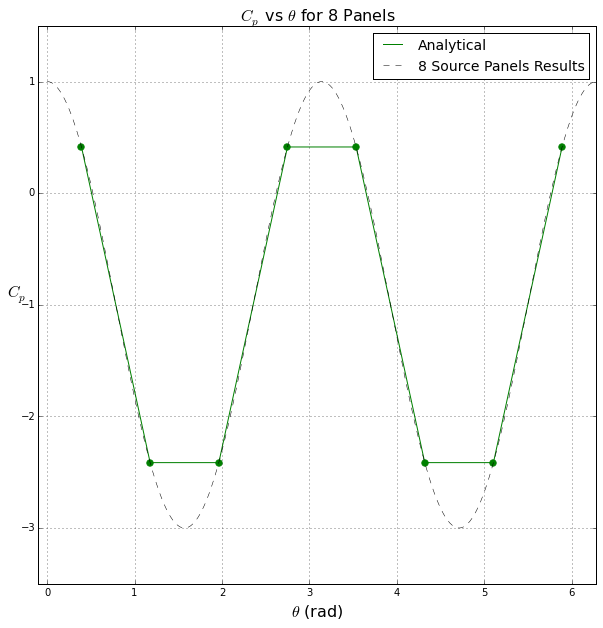

In [57]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('$\\theta$ (rad)', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16,rotation='horizontal')
pyplot.scatter([p.beta for p in p1], [p.cp for p in p1], color='g', s=40)
pyplot.plot([p.beta for p in p1], [p.cp for p in p1], color='g', linestyle='-',linewidth=1)
pyplot.plot(th, cp_analytical, color='k', linestyle='--', linewidth=0.5)
pyplot.xlim(-0.1, 2*math.pi)
pyplot.ylim(-3.5, 1.5);
pyplot.title('$C_p$ vs $\\theta$ for 8 Panels', fontsize=16)
pyplot.legend([ '8 Source Panels Results', 'Analytical'], loc='best', prop={'size':14});

**Figure 1: $C_p$ vs $\theta$ for 8 Panels**

In Figure 1, the black dashed line represents the analytical solution while the green line represent the panel method's solution. The green dots are points that the panel method calculated. Because there are only 8 panels, only 8 $C_p$ values are calculated. For this case, the panel method's solution, when each point are linearly connected, does not represent the analytical solution at the peaks but is close to the analytical solution at the slopes.

Plotting code of surface distribution for 32 panels, and the analytical solution:

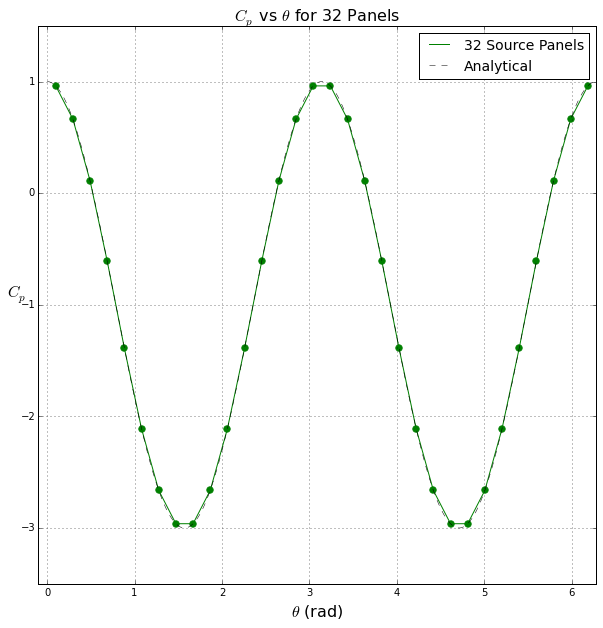

In [59]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('$\\theta$ (rad)', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16,rotation='horizontal')
pyplot.scatter([p.beta for p in p2], [p.cp for p in p2], color='g', s=40)
pyplot.plot([p.beta for p in p2], [p.cp for p in p2], color='g', linestyle='-',linewidth=1)
pyplot.plot(th, cp_analytical, color='k', linestyle='--', linewidth=0.5)
pyplot.xlim(-0.1, 2*math.pi)
pyplot.ylim(-3.5, 1.5);
pyplot.title('$C_p$ vs $\\theta$ for 32 Panels', fontsize=16)
pyplot.legend(['32 Source Panels', 'Analytical'], loc='best', prop={'size':14});

**Figure 2: $C_p$ vs $\theta$ for 32 Panels**

In Figure 2, the black dashed line represents the analytical solution while the green line represent the panel method's solution. The green dots are points that the panel method calculated. Because there are only 32 panels, only 32 $C_p$ values are calculated. For this case, the panel method's solution conforms to the analytical solution very well, but there are still jagged lines at the peaks.

Plotting code of surface distribution for 100 panels, and the analytical solution:

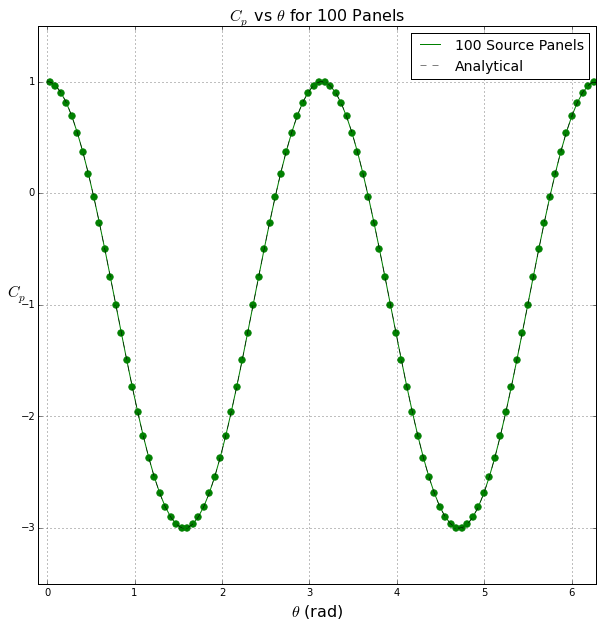

In [60]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('$\\theta$ (rad)', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16,rotation='horizontal')
pyplot.scatter([p.beta for p in p3], [p.cp for p in p3], color='g', s=40)
pyplot.plot([p.beta for p in p3], [p.cp for p in p3], color='g', linestyle='-',linewidth=1)
pyplot.plot(th, cp_analytical, color='k', linestyle='--', linewidth=0.5)
pyplot.xlim(-0.1, 2*math.pi)
pyplot.ylim(-3.5, 1.5);
pyplot.title('$C_p$ vs $\\theta$ for 100 Panels', fontsize=16)
pyplot.legend(['100 Source Panels', 'Analytical'], loc='best', prop={'size':14});

**Figure 3: $C_p$ vs $\theta$ for 100 Panels**

In Figure 3, the black dashed line represents the analytical solution while the green line represent the panel method's solution. The green dots are points that the panel method calculated. Because there are only 100 panels, only 100 $C_p$ values are calculated. For this case, the panel method's solution conforms to the analytical solution, and there aren't any noticeable jaggedness.

For each case, the panel method calculates $C_p$ values that are on the analytical solution's curve. However, the line plot generated using the panel meethod's points do not match the analytical solution's curve unless 100 panels are used. Therefore, more panels will generate a solution that matches the analytical solution better. But the panels do generate $C_p$ values on the analytical solution's curve. Because of that, selectively placing panels at desired locations for the pressure coefficient can generate an accurate $C_p$ without using many panels.

Code to calculate the errors for sequentially higher number of panels:

In [21]:
Ne = 10
it = 0
error = []
N = []
while Ne < 201:
    xe = R*numpy.cos(numpy.linspace(0, 2*math.pi, Ne+1))
    ye = R*numpy.sin(numpy.linspace(0, 2*math.pi, Ne+1))

    pe = numpy.empty(Ne, dtype=object)
    for i in range(0,Ne):
        pe[i] = Panel(xe[i], ye[i], xe[i+1], ye[i+1])

    panels_strength(pe, u_inf)
    panels_tangent(pe, u_inf)
    panels_cp(pe, u_inf)
    
    N.append(Ne)
    error.append(cp_error(pe))
    
    it += 1
    Ne += 5

Code to plot the errors as a function of the number of panels:

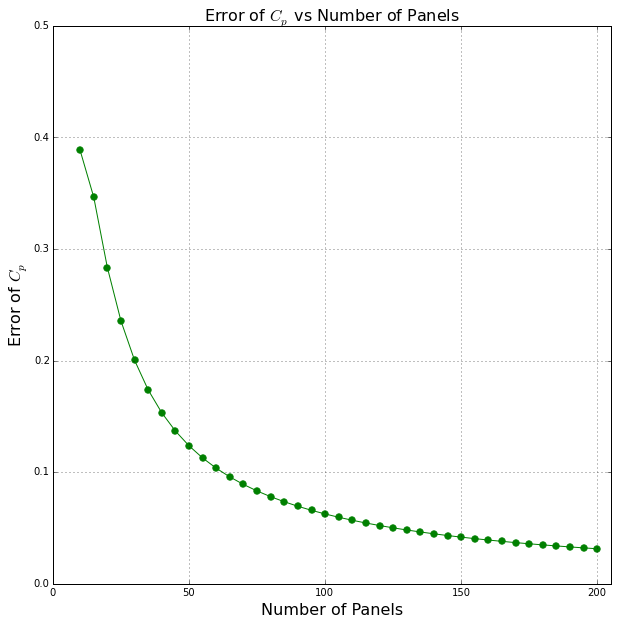

In [22]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('Number of Panels', fontsize=16)
pyplot.ylabel('Error of $C_p$', fontsize=16)
pyplot.scatter(N, error, color='g', s=40)
pyplot.plot(N, error, color='g', linestyle='-', linewidth=1)
pyplot.xlim(0, 205)
pyplot.ylim(0, 0.5);
pyplot.title('Error of $C_p$ vs Number of Panels', fontsize=16);

**Figure 4: Error of $C_p$ vs the Number of Panels**

Figure 4 shows that the error in $C_p$ decreases as the number of panels increases. With 200 panels, the error is around 0.03. Compared to the magnitude of the overall $C_p$ values, an error of 0.03 is negligible. But if smaller errors are wanted, Figure 4 does show that the trend beyond 200 panels is still decreasing even if the rate of decrease is slowing down.

In [68]:
#Exports the iterated error into a text file

#dat = numpy.zeros((len(error),2), dtype = float)
#for i in range(0,len(error)):
#    dat[i,0] = error[i]
#    dat[i,1] = N[i]
#    
#numpy.savetxt('cperror_iter.dat', dat, fmt = '% 00f',header='  Error     N')

Initialize mesh grid in order to plot pressure contours and streamlines:

In [26]:
N_grid = 200                              # Number of points in each direction
x_0, x_f = -4.0, 4.0            # x-direction boundaries
y_0, y_f = -4.0, 4.0            # y-direction boundaries
x = numpy.linspace(x_0, x_f, N_grid)    # 1D-array for x
y = numpy.linspace(y_0, y_f, N_grid)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Defines function to obtain velocity field when given the set of panels, and the mesh grid:

In [27]:
def panel_velocity_field(panels, X, Y):
    """Evaluates the velocity field generated by a set of panels.
    
    Arguments
    ---------
    panels -- panel from which the contribution is calculated.
    X -- grid of the x-locations
    Y -- grid of the y-locations
    
    Returns
    -------
    U -- x-component of the velocity field
    V -- y-component of the velocity field
    """
    m, n = numpy.shape(X) #Retrieves size of grid
    #Initialize
    U = numpy.zeros((m,n),dtype=float)
    V = numpy.zeros((m,n),dtype=float)
    
    #Calculates the velocity field at each point in the grid
    for i in range(0,m):
        for j in range(0,n):
            U[i,j] = 0.5/math.pi*sum([p.sigma*integral_u_panel(p, X[i,j], Y[i,j]) for p in panels])
            V[i,j] = 0.5/math.pi*sum([p.sigma*integral_v_panel(p, X[i,j], Y[i,j]) for p in panels])

    return U, V

Code to obtain the velocity field:

In [28]:
#Obtains the velocity field generated by the 32 panels case
U, V = panel_velocity_field(p2, X, Y)

U = U + u_inf*numpy.ones((N_grid,N_grid),dtype=float) #Adds the free stream contribution

Cp_grid = cp(U,V,u_inf)


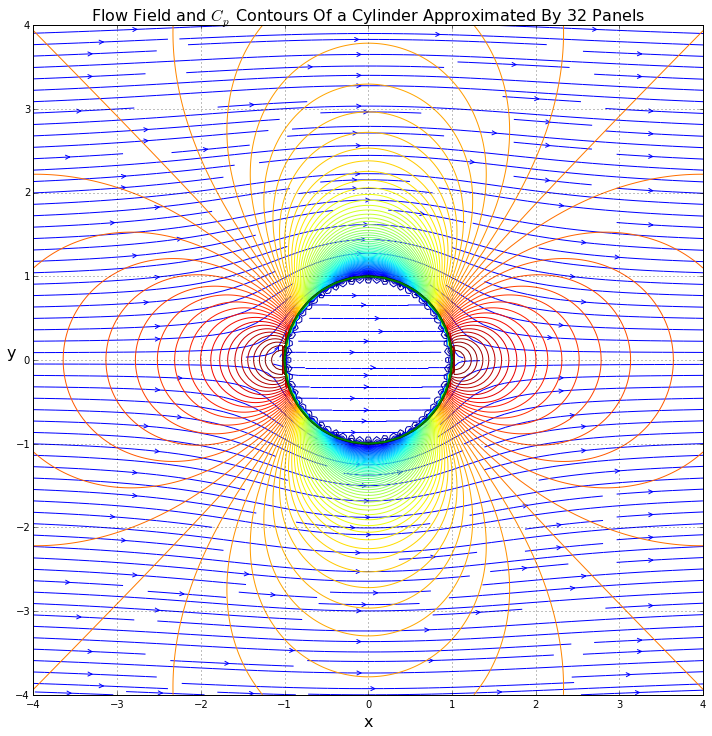

In [29]:
# Plotting flow field and Cp contours
size = 12
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16,rotation='horizontal')
pyplot.plot(x_cylinder, y_cylinder, color='k', linestyle='-', linewidth=2)
pyplot.plot(x2, y2, color='g', linestyle='-', linewidth=2)
pyplot.xlim(-4, 4)
pyplot.ylim(-4, 4);
pyplot.streamplot(X, Y, U, V, density=2, linewidth=1, arrowsize=1, arrowstyle='->');
pyplot.contour(X,Y,Cp_grid,100, linewidths=1, linestyles='solid');
pyplot.title('Flow Field and $C_p$ Contours Of a Cylinder Approximated By 32 Panels', fontsize=16);

**Figure 5: Flow Field and $C_p$ Contours Of a Cylinder Approximated By 32 Panels**

Figure 5 shows the velocity field and constant pressure contours of a cylinder in uniform flow, where the surface of the cylinder is approximated using 32 source panels. From the figure, the stream lines correctly envelops the cylinder, and the pressure contours shows that the pressure distribution is symmetric, agreeing with the analytical results.

---

### Problem 2: Symmetric Airfoil

#### Approach

The source panel method is used to approximate the surface of a NACA 0017 airfoil in a uniform flow. Two sets of panels are used to approximate the cylinder: the first set require 100 panels with a uniform x-spacing, and the second set require 100 panels with a circular x-spacing. For the uniform x-spacing, points are generated from 1 to 0 then from 0 back to 1 with the same step between each point. For the circular x-spacing, angles linearly spaced between 0 to 2$\pi$ are generated. These angles are transformed into x values using the polar coordinates transformation equations. The x-values from both sets of data are used to generate the y-values, which are the thickness values for a NACA XX17 airfoil. Using functions defined from Problem 1, the source strengths, tangential velocities, and the surface pressures are calculated for each set of panels.

Each panel's pressure coefficient value is then plotted against the panel's center x-location. Pressure coefficient values from the XFOIL program is read and then plotted on top of the panel method's data.

For the uniform x-spacing case, the pressure contours and streamlines are plotted using functions from Problem 1. The procedure is to calculate the total velocity vectors across a mesh grid and use those velocity vectors to calculate the pressure coefficients. With the total velocity vectors and pressure coefficients across the grid, the streamlines and contour lines can be plotted.

Equations for the normal force and axial force coefficients are defined as functions in order to calculate the lift force and drag force coefficients. Because the airfoil is at an angle of attack of zero, the normal force is equal to the lift force, and the axial force is equal to the drag force. Through iteration, the force coefficients are calculated with an increasing number of panels. The calculated force coefficients are then plotted as a function of the number of panels.

#### Equations

The NACA airfoil thickness equation is defined by the following equation:

$$
y_t\left(\frac{x}{c}\right) = \frac{t}{0.2}c
\left[
0.2969 \sqrt{\frac{x}{c}} - 0.1260 \left(\frac{x}{c}\right) - 0.3516\left(\frac{x}{c}\right)^2 + 0.2843 \left(\frac{x}{c}\right)^3 - 0.1015 \left(\frac{x}{c}\right)^4
\right]
$$

For a NACA 0017 airfoil, $t$ is set to be 0.17. The equation is defined as a function below:

In [30]:
def yt(xc):
    """The thickness value/y-value of a NACAXX17 airfoil at a chordwise x-position
    
    Arguments
    ---------
    xc -- Chordwise x-position
    Returns
    ---------
    yt -- the thickness value at xc
    """
    t = 0.17
    c = 1
    yt = (t/0.2)*c*(0.2969*(xc ** (0.5)) - 0.1260*(xc) - 0.3516*(xc ** 2) + 0.2843*(xc ** 3) - 0.1015*(xc ** 4))
    return yt

The derivative of the NACA thickness equation with respect to x is defined as follows:

$$
\frac{d y_t}{d x}\left(\frac{x}{c}\right) = \frac{t}{0.2}
\left[
\frac{1}{2}\left(0.2969\right) \sqrt{\frac{x}{c}} - 0.1260 - 2(0.3516)\left(\frac{x}{c}\right)^2 + 3(0.2843) \left(\frac{x}{c}\right)^3 - 4(0.1015) \left(\frac{x}{c}\right)^4
\right]
$$

This equation is programmed as a function below:

In [31]:
def dyt_dx(xc):
    """dyt_dx value of a NACAXX17 airfoil at a chordwise x-position
    
    Arguments
    ---------
    xc -- Chordwise x-position
    Returns
    ---------
    dyt_dx -- the thickness value at xc
    """
    t = 0.17 #thickness ratio
    c = 1 #chord length
    dyt_dx = (t/0.2)*(0.5*0.2969*(xc ** (-0.5)) - 0.1260 - 0.3516*2*xc + 0.2843*3*(xc ** 2) - 0.1015*4*(xc ** 3))
    return dyt_dx

For zero angle of attack, the coefficients for lift force and drag force are merely the coefficients for the normal force and axial force:

$$
C_l = C_n
$$

$$
C_d = C_a
$$

Eq. 1.15 from Anderson's Fundamentals then also defines the lift coefficient:

$$
C_l = C_n = \int_0^1 \left(C_{p,l}\right) {\rm d}\frac{x}{c} + \int_0^1 \left(-C_{p,u}\right) {\rm d}\frac{x}{c}
$$

This equation is defined as a function below:

In [70]:
def Cn(Cp_l, x_l, Cp_u, x_u):
    """Numerically integrates Cp across airfoil to obtain the normal force coefficient. Neglects the friction coefficient.
    
    Arguments
    ---------
    Cp_l -- Cp values for the lower portion of the airfoil
    x_l -- x-values corresponding to Cp_l
    Cp_u -- Cp values for the upper portion of the airfoil
    x_u -- x-values corresponding to Cp_u
    
    Returns
    -------
    Cn -- Axial force coefficient
    """
    c = 1; #chord length

    #1st term from 1.15 with only upper part
    integrand_l = [Cp_l[i] for i in range(0,len(Cp_l))]
    #Variable to store the sum of areas
    integrate_l = 0
    #Evaluates trapezoidal area between two x-values and adds to integration variable
    for i in range(0,len(Cp_l) - 1):
        integrate_l = integrate_l + 0.5*(integrand_l[i] + integrand_l[i+1])*(x_l[i+1] - x_l[i])

    #1st term from 1.15 with lower upper part
    integrand_u = [-Cp_u[i] for i in range(0,len(Cp_u))]

    integrate_u = 0
    for i in range(0,len(Cp_u) - 1):
        integrate_u = integrate_u + 0.5*(integrand_u[i] + integrand_u[i+1])*(x_u[i+1] - x_u[i])

    #Sum of all integrations
    Cn = (1/c)*(integrate_l + integrate_u)
    return Cn

And Eq. 1.16 from Anderson's Fundamentals then also defines the drag coefficient:

$$
C_d = C_a = \int_0^1 \left(C_{p,u}\frac{z_u}{x}\right) {\rm d}\frac{x}{c} + \int_0^1 \left(-C_{p,l}\frac{z_l}{x}\right) {\rm d}\frac{x}{c}
$$

This equation is defined as a function below:

In [71]:
def Ca(Cp_l, x_l, dyldx, Cp_u, x_u, dyudx):
    """Numerically integrates Cp across airfoil to obtain the axial force coefficient. Neglects the friction coefficient.
    
    Arguments
    ---------
    Cp_l -- Cp values for the lower portion of the airfoil
    x_l -- x-values corresponding to Cp_l
    dyldx -- dydx values corresponding to Cp_l
    Cp_u -- Cp values for the upper portion of the airfoil
    x_u -- x-values corresponding to Cp_u
    dyudx -- dydx values correspondting to Cp_u
    
    Returns
    -------
    Ca -- Axial force coefficient
    """
    c = 1; #chord length

    #1st term from 1.16 with only upper part
    integrand_u = [Cp_u[i]*dyudx[i] for i in range(0,len(Cp_u))]

    integrate_u = 0
    for i in range(0,len(Cp_u) - 1):
        integrate_u = integrate_u + 0.5*(integrand_u[i] + integrand_u[i+1])*(x_u[i+1] - x_u[i])

    #1st term from 1.16 with only lower part
    integrand_l = [-Cp_l[i]*dyldx[i] for i in range(0,len(Cp_l))]

    integrate_l = 0
    for i in range(0,len(Cp_l) - 1):
        integrate_l = integrate_l + 0.5*(integrand_l[i] + integrand_l[i+1])*(x_l[i+1] - x_l[i])


    Ca = (1/c)*(integrate_u + integrate_l)
    return Ca

#### Code and Results

Defining freestream flow speed, number of panels, and airfoil geometry:

In [72]:
u_inf = 1.0 #Freestream speed

N_panels = 100 #Number of panels

x_af = numpy.linspace(0,1,200) #x-values for the airfoil
y_af = yt(x_af) #The upper portion of the airfoil

y_af = numpy.append(y_af,-yt(x_af[::-1])) #Appends the lower portion of the airfoil to previous y-values
x_af = numpy.append(x_af,x_af[::-1]) #Extends the previous x-values with its reverse

Even panel spacing in x-direction:

In [35]:
x_lin_u, step = numpy.linspace(1,0,51, retstep=True) #x-values for upper portion of airfoil
x_lin_l = numpy.linspace(0-step,1,50) #x-values for lower portion of airfoil

y_lin = yt(x_lin_u) #Calculates y-values of upper airfoil

y_lin = numpy.append(y_lin,-yt(x_lin_l)) #Calculates y-values of lower airfoil and add to y-values list
x_lin = numpy.append(x_lin_u, x_lin_l) #Combine both x-values list together

#Sets up panels and calculate source strengths, tangential velocities, and coefficient of pressure at the surface
p_lin = numpy.empty(N_panels, dtype = object)
for i in range(0,N_panels):
    p_lin[i] = Panel(x_lin[i], y_lin[i], x_lin[i+1], y_lin[i+1])

#Calculates the panels' source strengths, tangential velocities, and Cp's
panels_strength(p_lin, u_inf)
panels_tangent(p_lin, u_inf)
panels_cp(p_lin, u_inf)

Panel size distributed according to x-spacing on a circle:

In [36]:
x_theta = 0.5 + 0.5*numpy.cos(numpy.linspace(0, 2*math.pi, N_panels+1)) #x-values around a half-unit-circle centered on airfoil
y_theta = yt(x_theta) #y-values for circular x-distribution

#For-loop to correct for y-values in the lower part of the airfoil
for i in range(1,len(x_theta)):
    if x_theta[i] - x_theta[i-1] > 0:
        y_theta[i] = y_theta[i]*-1

#Sets up panels and calculate source strengths, tangential velocities, and coefficient of pressure at the surface
p_theta = numpy.empty(N_panels, dtype = object)
for i in range(0,N_panels):
    p_theta[i] = Panel(x_theta[i], y_theta[i], x_theta[i+1], y_theta[i+1])

#Calculates the panels' source strengths, tangential velocities, and Cp's
panels_strength(p_theta, u_inf)
panels_tangent(p_theta, u_inf)
panels_cp(p_theta, u_inf)

Loads inviscid XFOIL panel code results:

In [37]:
x_data, cp_data = numpy.genfromtxt('naca0017_a0_cp.dat',skip_header=1,unpack=True)

Code to plot the surface pressure distributions:

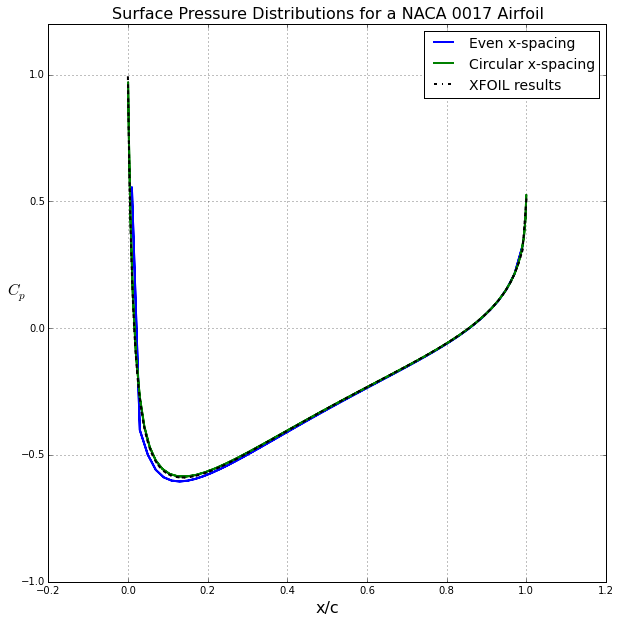

In [78]:
size = 10
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x/c', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16,rotation='horizontal')
pyplot.plot([p.xc for p in p_lin], [p.cp for p in p_lin], color='b', linestyle='-', linewidth=2)
#pyplot.plot([p.xc for p in p_lin if p.yc < 0], [p.cp for p in p_lin if p.yc < 0], color='b', linestyle='-', linewidth=1)
pyplot.plot([p.xc for p in p_theta], [p.cp for p in p_theta], color='g', linestyle='-', linewidth=2)
pyplot.plot(x_data, cp_data, color='k', linestyle='-.', linewidth=2)
pyplot.xlim(-0.2, 1.2)
pyplot.ylim(-1, 1.2);
pyplot.title('Surface Pressure Distributions for a NACA 0017 Airfoil', fontsize=16);
pyplot.legend(['Even x-spacing', 'Circular x-spacing', 'XFOIL results'], loc='best', prop={'size':14});

**Figure 6: Surface Pressure Distributions for a NACA 0017 Airfoil**

Figure 6 shows the surface pressure distribution generated by a set of panels defined using uniform x-spacing, a set of panels defined using angular x-spacing, and the XFOIL panel program. The uniform x-spacing results is the blue line, the angular x-spacing results is the green line, and the XFOIL results is the dashed black line. The angular x-spacing results match very well with the XFOIL results, indicating that the XFOIL program most likely used the same spacing. The uniform x-spacing results do not match the XFOIL results near the leading edge. The uniform x-spacing results has a jagged peak compared to the other results but it does match the other results very well in other areas.

Initializes mesh grid:

In [39]:
N_grid = 100                              # Number of points in each direction
x_0, x_f = -1.0, 2.0            # x-direction boundaries
y_0, y_f = -0.8, 0.8            # y-direction boundaries
x = numpy.linspace(x_0, x_f, N_grid)    # 1D-array for x
y = numpy.linspace(y_0, y_f, N_grid)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Obtains velocity field, and calculates Cp values:

In [40]:
#Obtains the velocity field generated by the 32 panels case
U_lin, V_lin = panel_velocity_field(p_lin, X, Y)

U_lin = U_lin + u_inf*numpy.ones((N_grid,N_grid),dtype=float) #Adds the free stream contribution

Cp_lin_grid = cp(U_lin,V_lin,u_inf)

Plotting code:

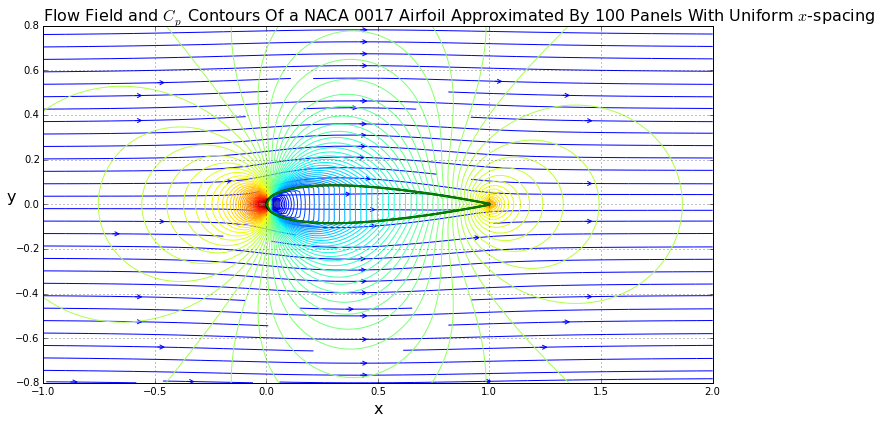

In [77]:
# Plotting flow field and Cp contours
size = 12
pyplot.figure(figsize=(size,(1.6/3)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16,rotation='horizontal')
pyplot.plot(x_af, y_af, color='k', linestyle='-', linewidth=2)
pyplot.plot(x_lin, y_lin, color='g', linestyle='-', linewidth=2)
pyplot.xlim(-1, 2)
pyplot.ylim(-0.8, 0.8)
pyplot.streamplot(X, Y, U_lin, V_lin, density=1, linewidth=1, arrowsize=1, arrowstyle='->');
pyplot.contour(X,Y,Cp_lin_grid,100, linewidths=1, linestyles='solid');
pyplot.title('Flow Field and $C_p$ Contours Of a NACA 0017 Airfoil Approximated By 100 Panels With Uniform $x$-spacing', fontsize=16, loc='left');

**Figure 7: Flow Field and $C_p$ Contours Of a NACA 0017 Airfoil Approximated By 100 Panels With Uniform $x$-spacing**

Figure 7 shows the velocity field and constant pressure contours of a NACA 0017 airfoil in uniform flow. The airfoil is approximated by 100 panels with uniform x-spacing. From the figure, the stream lines correctly envelops the airfoil, and the pressure contours shows that the pressure distribution is top-bottom symmetric, agreeing with predicted results that a zero camber airfoil has zero lift at zero angle of attack. For a symmetric flow, the drag should also be zero, but from the plot, it is possible the drag is nonzero.

Initializes iteration:

In [83]:
N_panels = 10
itr = 0

N = []
Cl = []
Cd = []

Iterate for force coefficients, beginning with 10 panels:

In [87]:
#Increment for continuing off previous run
#N_panels += 10

while N_panels < 251:
    x_itr_u, step = numpy.linspace(1,0,N_panels/2 + 1, retstep=True) #x-values for upper portion of airfoil
    x_itr_l = numpy.linspace(0-step,1,N_panels/2) #x-values for lower portion of airfoil

    y_itr = yt(x_itr_u) #Calculates y-values of upper airfoil

    y_itr = numpy.append(y_itr,-yt(x_itr_l)) #Calculates y-values of lower airfoil and add to y-values list
    x_itr = numpy.append(x_itr_u, x_itr_l) #Combine both x-values list together
    #Sets up panels and calculate source strengths, tangential velocities, and coefficient of pressure at the surface
    p_itr = numpy.empty(N_panels, dtype = object)
    for i in range(0,N_panels):
        p_itr[i] = Panel(x_itr[i], y_itr[i], x_itr[i+1], y_itr[i+1])
    
    #Calculates the source strengths, tangent velocities, and Cps of the panel set
    panels_strength(p_itr, u_inf)
    panels_tangent(p_itr, u_inf)
    panels_cp(p_itr, u_inf)

    #Obtains the locations, derivative, and cp values for the upper airfoil from the panels
    #Also reverses the order of the values to properly integrate
    x_u = numpy.array([p.xc for p in p_itr if p.yc > 0][::-1], dtype = float)
    y_u = numpy.array([p.yc for p in p_itr if p.yc > 0][::-1], dtype = float)
    dy_dx_u = dyt_dx((x_u))
    cp_u = numpy.array([p.cp for p in p_itr if p.yc > 0][::-1], dtype = float)

    #Obtains the locations, derivative, and cp values for the lower airfoil from the panels
    x_l = numpy.array([p.xc for p in p_itr if p.yc < 0], dtype = float) 
    y_l = numpy.array([p.yc for p in p_itr if p.yc < 0], dtype = float)
    dy_dx_l = -dyt_dx((x_l))
    cp_l = numpy.array([p.cp for p in p_itr if p.yc < 0], dtype = float)

    #Because angle of attack is 0 degrees, lift coefficient equals normal force coefficient & drag coefficient equals axial force coeff.
    Cl.append(Cn(cp_l, x_l, cp_u, x_u))
    Cd.append(Ca(cp_l, x_l, dy_dx_l, cp_u, x_u, dy_dx_u))
    N.append(N_panels)
    print(itr)
    
    itr += 1
    N_panels += 10

Or load data from 'clcd_iter.dat' file:

In [2]:
#Cl, Cd, N = numpy.loadtxt('clcd_iter.dat',skiprows = 1, unpack = True)

Code to plot iterated coefficients versus number of panels:

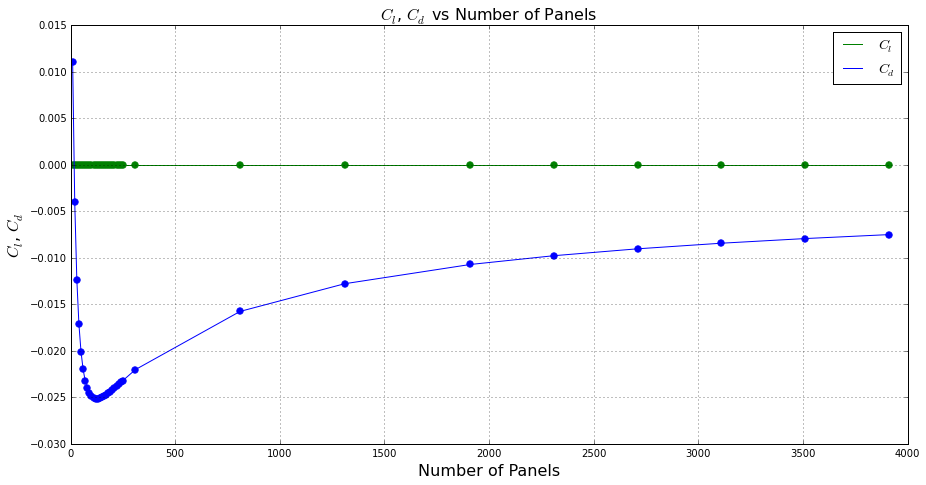

In [7]:
size = 10
pyplot.figure(figsize=(size*1.5, size*0.75))
pyplot.grid(True)
pyplot.xlabel('Number of Panels', fontsize=16)
pyplot.ylabel('$C_l$, $C_d$', fontsize=16)
pyplot.scatter(N, Cl, color='g', s=40)
pyplot.plot(N, Cl, color='g', linestyle='-', linewidth=1)
pyplot.scatter(N, Cd, color='b', s=40)
pyplot.plot(N, Cd, color='b', linestyle='-', linewidth=1)
pyplot.xlim(0, 4000)
pyplot.title('$C_l$, $C_d$ vs Number of Panels', fontsize=16);
pyplot.legend(['$C_l$', '$C_d$'], loc='best', prop={'size':14});

**Figure 8: $C_l$, $C_d$ vs Number of Panels**

Figure 8 shows the change in the calculated lift and drag coefficient as the number of panels used to approximate the airfoil is increased. For a truly invicid, symmetric flow, both the lift and drag coefficients is zero. The panel method is accurate for the lift coefficient; the lift coefficient remains at zero for any number of panels. On the other hand, the drag coefficient decreases to a value of about -0.025 at around 120 panels. However, after 120 panels, the drag coefficient increases steadily as the number of panels increase. This may indicate that the drag coefficient is approaching zero.

The lift coefficient converges to $0$ at the earliest of my results with $10$ panels. The drag coefficient approaches $-0.025$ at $120$ panels, but increases steadily when increasing the number of panels past 120 panels. Past 120 panels and into 4000 panels, the drag coefficient is increasing steadily to 0.0, although its rate of increase is also decreasing.


In [69]:
#Exports the iterated data into a text file

#dat = numpy.zeros((len(Cd),3), dtype = float)
#for i in range(0,len(Cd)):
#    dat[i,0] = Cl[i]
#    dat[i,1] = Cd[i]
#    dat[i,2] = N[i]
    
#numpy.savetxt('clcd_iter.dat', dat, fmt = '% 00f',header='  Cl        Cd        N')

---

### Problem 3: Quonset Hut

#### Approach

The approach in this problem is similar to the approach in Problem 1. A set of theta values from 0 to 2$\pi$ is generated. These theta values are used to calculate the (x,y) values in Cartesian coordinates. The (x,y) values are used to generate panels that form a 2D circle. In this problem, 200 panels are for greater accuracy. The pressure coefficient for each panel is calculated and is then used to calculate the lift coefficient through numerical integration using the Trapezoidal rule. The integral is a definite integral from 0 to $\pi$ for a half-circle and integrates the normal pressures on the surface projected onto the y-axis over a differential length of the circle. The result is valid because a dividing streamline exists that can represent the ground.

#### Equations

The pressure coefficient is defined by the following equation:

$$
C_p = \frac{p_n - p_\infty}{q_\infty}
$$

The normal force is equal to the lift force for a circular cross section. This force is obtained by integrating the pressure normals across the surface of the cylinder. For a cross section, a force per unit length is obtained. For the Quonset Hut, where our interest is in the upper half of the circle, the following equation defines the lift force per unit length:

$$
N' = L' = -R\int_0^\pi p_n \sin\theta {\rm d}\theta
$$

Dividing by the dynamic pressure, the follow results:

$$
C_l = -R\int_0^\pi \left(C_p - \frac{p_\infty}{q_\infty}\right) \sin\theta {\rm d}\theta
$$

The term with the free stream pressure is much smaller than $C_p$ so it can be assumed to be zero, and the final result is obtained below:

$$
C_l = -R\int_0^\pi C_p \sin\theta {\rm d}\theta
$$

The analytical solution for the $C_p$ of a cylinder is:

$$
C_p(\theta) = 1-4\sin^2\theta
$$

Plugging into the lift coefficient equation:

$$
C_l = -R\int_0^\pi \left(1-4\sin^2\theta\right) \sin\theta {\rm d}\theta
$$

The lift coefficient results to be about 3.3333 R:

$$
C_l = 3.3333R
$$

Numerically, $\theta$ is equal to the value of $\beta$ of each panel. By numerically integrating using the $\beta$'s as theta's, the lift coefficient of the Quonset Hut can be obtained.

The integral for the lift coefficient is defined by the following function:

In [90]:
def integrate_hut(panels):
    """Numerically integrates the pressure force in the y-direction across the half circle.
    
    Arguments
    ---------
    panels -- a list of Panel objects that defines the circle
    
    Returns
    -------
    integral -- Value of integral from the equation for the lift coefficient
    """
    theta = [p.beta for p in panels if p.beta <= math.pi + 0.0001] #Obtains values of beta from 0 to pi inclusive
    Np = len(theta) #Number of panels that fit 0 to pi range
    
    integrand = [panels[i].cp*numpy.sin(panels[i].beta) for i in range(0,Np)]
    
    integral = 0
    for i in range(0,Np-1):
        integral = integral + 0.5*(integrand[i] + integrand[i+1])*(theta[i+1] - theta[i])
    return integral
    

#### Code and Results

Code to setup the problem:

In [92]:
u_inf = 100*5280/(60*60)           # free-stream speed (ft/s)

In [93]:
# Defines the cylinder
R = 20                                                     # radius

theta = numpy.linspace(0, 2*math.pi, 100)                           # angles in radians
x_cylinder, y_cylinder = R*numpy.cos(theta), R*numpy.sin(theta)   # coordinates of the half cylinder

Creates the source panels for a full circle and calculates the relevant variables:

In [94]:
N_hut = 200 # Number of panels
theta = numpy.linspace(0, 2*math.pi,N_hut+1) #Angle range

x_hut = R*numpy.cos(theta) #x-values for the circle
y_hut = R*numpy.sin(theta) #y-values for the circle

p_hut = numpy.empty(N_hut, dtype=object)
for i in range(0,N_hut):
    p_hut[i] = Panel(x_hut[i], y_hut[i], x_hut[i+1], y_hut[i+1])

#Calculates panel set's values
panels_strength(p_hut, u_inf)
panels_tangent(p_hut, u_inf)
panels_cp(p_hut, u_inf)


Calculates the lift coefficient and the lift force using sea level atmospheric data from Anderson's Fundamentals's Appendix E:

In [95]:
Cl = -integrate_hut(p_hut)*R
L = Cl*0.5*(2.3769*10**-3)*(u_inf**2)*2*R
print('The lift coefficient is:', Cl)
print('Using sea level atmospheric data, the lift force per unit length is:', L)

The lift coefficient is: 66.6748800073
Using sea level atmospheric data, the lift force per unit length is: 68181.4122561


The lift coefficient is $66.675$. The result from the analytical solution would result in $20(3.3333)=66.6666$. Therefore the results are accurate to 3 significant figures.

And the resultant lift force per unit length is $68181$ $lbf/ft$.

---

## Conclusion

The results show that the source panel method is useful for modeling objects in a uniform incompressible, invisicid flow. The accuracy of the source panel method depends on the number of panels and the type of spacing used to generate the model of the object. For an airfoil and a circle, a circular x-spacing generated by angles is more accurate than a linear uniform x-spacing. In addition, higher number of panels results in a smaller error, where 150 to 200 panels should have negligible error in most cases. The lift calculated using the panel method is also very accurate and does not require a lot of panels. On the other hand, the panel method is inaccurate when calculating drag, requiring a lot of panels before approaching zero. Another flaw of the panel method is that it requires a lot of processing power if a lot of panels are used. Therefore, there may be a limit to the complexity of the object being modeled.